In [29]:
# Biblioteca do Turing USP implementada por nós!
from turingquant.optimizers import Markowitz

from hack_itau_quant import HRP
from hack_itau_quant.backtesting import Backtesting
from hack_itau_quant.markowitz_monte_carlo import MarkowitzMonteCarlo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
stocks = ['PETR4.SA', 'BPAC11.SA', 'ITUB4.SA', 'HGLG11.SA', 'VIVT3.SA']
prices = yf.download(stocks).Close.loc['2018':].dropna()

returns = prices.pct_change()[1:]
expected_returns = returns.mean()
cov_matrix = returns.cov()

prices.head()

[*********************100%***********************]  5 of 5 completed


,BPAC11.SA,HGLG11.SA,ITUB4.SA,PETR4.SA,VIVT3.SA
Date,,,,,
2018-01-02,18.90,129.602997,29.253332,16.549999,41.400002
2018-01-03,19.08,129.899994,29.453333,16.700001,40.200001
2018-01-04,19.15,129.998993,30.066666,16.730000,40.639999
2018-01-05,18.77,130.000000,30.153334,16.830000,40.740002
2018-01-08,19.00,130.000000,30.053333,17.030001,41.169998


In [3]:
markowitz = Markowitz(prices)

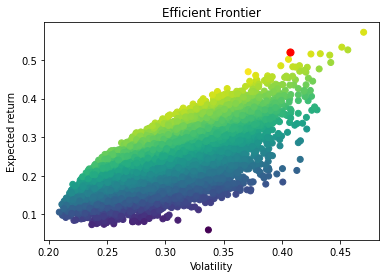

In [4]:
markowitz.plot_efficient_frontier()

In [5]:
markowitz.best_portfolio('volatility')

array([0.01855166, 0.46707888, 0.1675255 , 0.02655877, 0.32028519])

In [6]:
hrp = HRP(cov_matrix)

array([0.05378805, 0.41636792, 0.23083428, 0.05554707, 0.24346268])

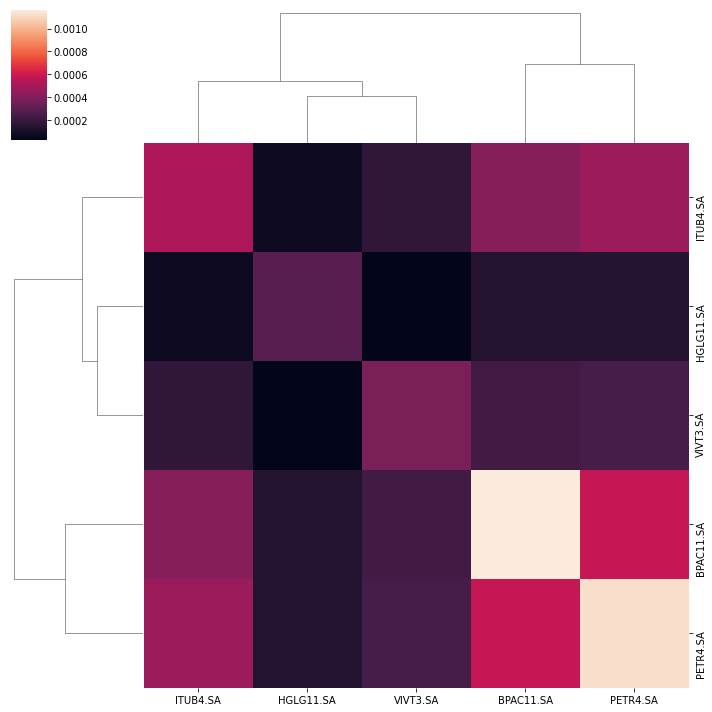

In [7]:
hrp.optimize()

In [8]:
backtesting = Backtesting(prices = prices, rebalance_frequency = 20,
                          initial_investment = 10000, investment_on_rebalance = 1000)

In [9]:
%%capture
result = backtesting.run()

In [10]:
result.head()

,Equal Weight,Markowitz,HRP
Date,,,
2018-01-05,9982.969944,10001.821861,9979.496684
2018-01-08,10045.409356,10020.454747,10004.153657
2018-01-09,9989.458655,9952.536162,9933.294674
2018-01-10,9914.451014,9923.826520,9904.144870
2018-01-11,10090.142852,10003.377423,9961.792839


<AxesSubplot:xlabel='Date'>

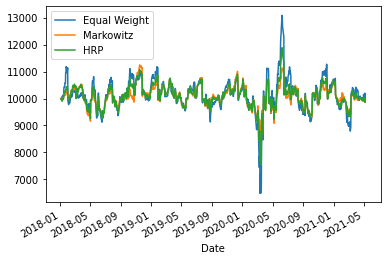

In [11]:
result.plot()

In [42]:
from turingquant.metrics import drawdown, rolling_sharpe

In [13]:
returns = result.pct_change()[1:]

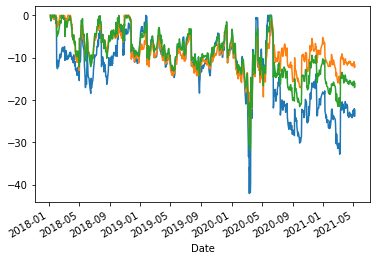

In [31]:
for column in returns.columns:
    drawdown(returns[column]).plot()

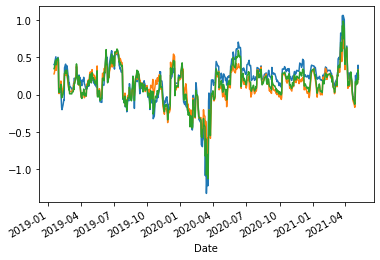

In [37]:
for column in returns.columns:
    rolling_sharpe(returns[column], 252).plot()

<AxesSubplot:>

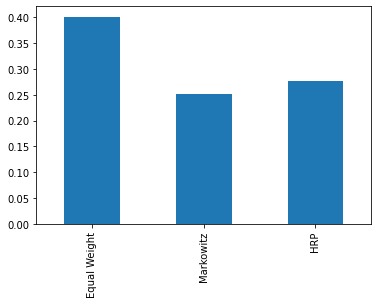

In [51]:
(returns.std() * np.sqrt(252)).plot.bar()

<AxesSubplot:>

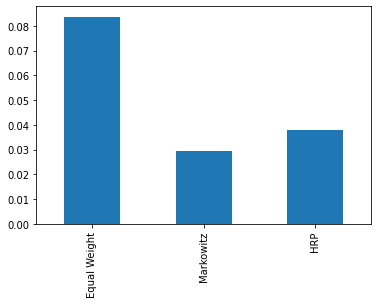

In [50]:
(returns.mean() * 252).plot.bar()